In [1]:
import pandas as pd
from pathlib import Path 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path_to_results = Path("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway")

In [2]:
combs = ["A549_IFNB", "BXPC3_IFNG", "HAP1_TGFB", "HT29_TNFA", "K562_INS"]


n_splits = 3
pert_effects = {}

for comb in combs:
    identity_res_deg= pd.read_csv(path_to_results / f"identity_ood_metrics_deg_{comb}.csv", index_col=0).T
    gene_list = identity_res_deg.sort_values(by="r_squared")
        
    gene_list["perturbation"] = gene_list.index.copy()
    gene_list = gene_list.reset_index(drop=True)
    
    gene_list["Perturbation effect"] = None
    
    range_cond = np.arange(len(gene_list))
    range_cond_split = np.array_split(range_cond,n_splits)
    for i, idx_list in enumerate(range_cond_split):
        gene_list.loc[idx_list, "Perturbation effect"] = i
    gene_list = gene_list.set_index("perturbation") 
    pert_effects[comb] = gene_list

In [3]:
encoded_result_dfs = []

for comb in ["A549_IFNB", "BXPC3_IFNG", "HAP1_TGFB", "HT29_TNFA", "K562_INS"]:
    cellflow_res = pd.read_csv(path_to_results / f"cellflow_ood_metrics_encoded_{comb}.csv", index_col=0).T
    identity_res= pd.read_csv(path_to_results / f"identity_ood_metrics_encoded_{comb}.csv", index_col=0).T
    mean_res = pd.read_csv(path_to_results / f"mean_train_metrics_encoded_{comb}.csv", index_col=0).T

    split_comb = comb.split("_")
    cellflow_res["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 
    mean_res["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 
    identity_res["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 

    cellflow_res["Model"] = "CellFlow" 
    mean_res["Model"] = "Mean" 
    identity_res["Model"] = "Identity" 

    encoded_result_dfs.append(cellflow_res)
    encoded_result_dfs.append(mean_res)
    encoded_result_dfs.append(identity_res)

In [4]:
encoded_result_dfs = pd.concat(encoded_result_dfs, axis=0)
encoded_result_dfs["ood_combination"] = encoded_result_dfs["OOD combination"] 
encoded_result_dfs["sinkhorn_div"] = encoded_result_dfs["sinkhorn_div_1"] + encoded_result_dfs["sinkhorn_div_10"] + encoded_result_dfs["sinkhorn_div_100"]


In [5]:
encoded_result_dfs.head()

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,OOD combination,Model,ood_combination,sinkhorn_div
A549_IFNB_ADAR,0.914217,24.411303,13.434223,8.492722,16.126040,0.040042,A549/IFNB,CellFlow,A549/IFNB,46.338247
A549_IFNB_CEBPB,0.985758,12.350510,3.313440,1.502861,2.759218,0.010999,A549/IFNB,CellFlow,A549/IFNB,17.166811
A549_IFNB_CEBPG,0.994984,10.087988,1.642624,0.544861,1.005326,0.005194,A549/IFNB,CellFlow,A549/IFNB,12.275473
A549_IFNB_CRKL,0.991699,12.059318,2.842348,0.971191,1.765424,0.010589,A549/IFNB,CellFlow,A549/IFNB,15.872857
A549_IFNB_DRAP1,0.986236,12.660575,3.455837,1.535767,2.768025,0.010005,A549/IFNB,CellFlow,A549/IFNB,17.652179


In [6]:
def get_pert_effect(x):
    ood_comb = x["ood_combination"].replace("/", "_")
    return pert_effects[ood_comb].loc[x["ood_cond"]]["Perturbation effect"]

In [7]:
encoded_result_dfs["ood_cond"] = encoded_result_dfs.index
encoded_result_dfs["perturbation_effect"] = encoded_result_dfs.apply(get_pert_effect, axis=1)

In [8]:
encoded_result_dfs.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/figures/satija/benchmark/gene_pathway_cell_line_hold_out/metrics_encoded.csv")

/tmp/ipykernel_2387040/3967805988.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/3967805988.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/3967805988.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/3967805988.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/3967805988.py:25: UserWarning

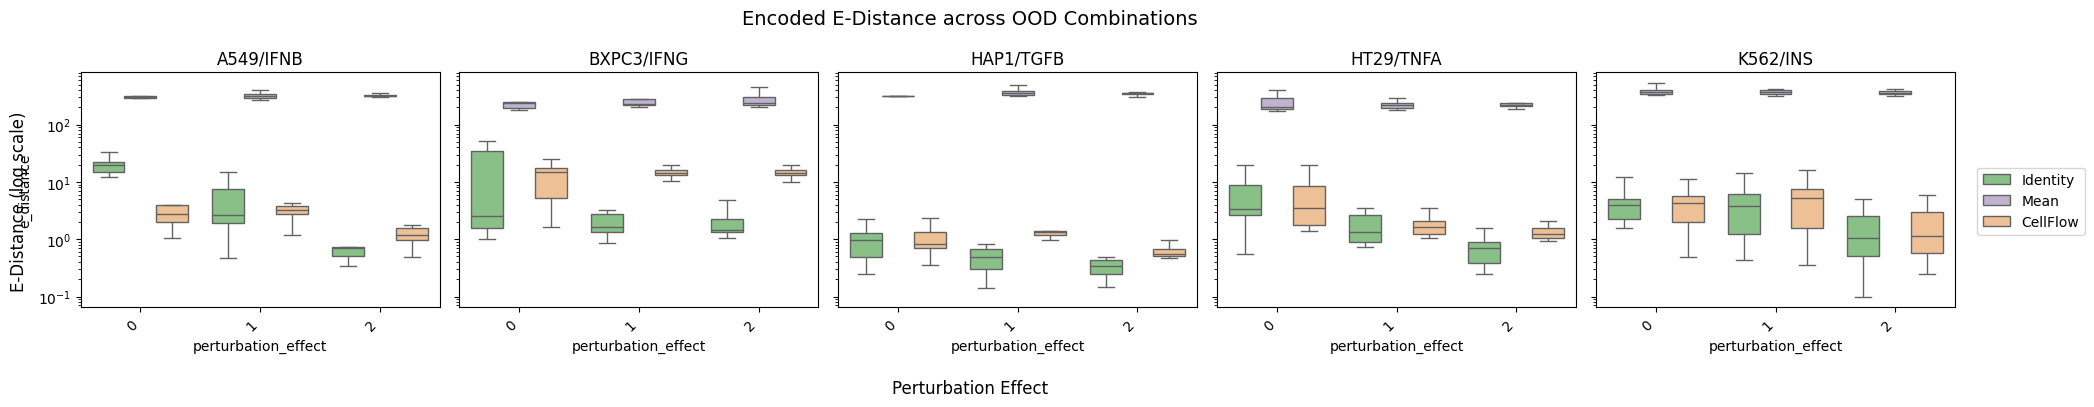

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select 5 unique ood_combination values
unique_combinations = encoded_result_dfs["ood_combination"].unique()[:5]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)  # 5 columns, shared y-axis

# Iterate over unique combinations and plot in subplots
for i, combination in enumerate(unique_combinations):
    ax = axes[i]
    sns.boxplot(
        data=encoded_result_dfs[encoded_result_dfs["ood_combination"] == combination], 
        hue="Model", 
        x="perturbation_effect", 
        y="e_distance", 
        showfliers=False, 
        hue_order=["Identity", "Mean", "CellFlow"], 
        palette="Accent",
        ax=ax
    )

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yscale('log')

    # Set title for each subplot
    ax.set_title(combination)

    # Remove legend from individual plots (keep only one legend for clarity)
    ax.legend_.remove()

# Add global labels
fig.supxlabel("Perturbation Effect", fontsize=12)
fig.supylabel("E-Distance (log scale)", fontsize=12)
fig.suptitle("Encoded E-Distance across OOD Combinations", fontsize=14)

# Add a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
deg_result_dfs = []

for comb in ["A549_IFNB", "BXPC3_IFNG", "HAP1_TGFB", "HT29_TNFA", "K562_INS"]:
    cellflow_res_deg = pd.read_csv(path_to_results / f"cellflow_ood_metrics_deg_{comb}.csv", index_col=0).T
    identity_res_deg= pd.read_csv(path_to_results / f"identity_ood_metrics_deg_{comb}.csv", index_col=0).T
    mean_res_deg = pd.read_csv(path_to_results / f"mean_train_metrics_deg_{comb}.csv", index_col=0).T

    split_comb = comb.split("_")
    cellflow_res_deg["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 
    mean_res_deg["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 
    identity_res_deg["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 

    cellflow_res_deg["Model"] = "CellFlow" 
    mean_res_deg["Model"] = "Mean" 
    identity_res_deg["Model"] = "Identity" 

    deg_result_dfs.append(cellflow_res_deg)
    deg_result_dfs.append(mean_res_deg)
    deg_result_dfs.append(identity_res_deg)

In [11]:
deg_result_dfs = pd.concat(deg_result_dfs, axis=0)
deg_result_dfs["ood_combination"] = deg_result_dfs["OOD combination"] 

In [12]:
deg_result_dfs["ood_cond"] = deg_result_dfs.index
deg_result_dfs["perturbation_effect"] = deg_result_dfs.apply(get_pert_effect, axis=1)

In [13]:
deg_result_dfs.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/figures/satija/benchmark/gene_pathway_cell_line_hold_out/metrics_deg.csv")

/tmp/ipykernel_2387040/211131152.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/211131152.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/211131152.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/211131152.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/211131152.py:25: UserWarning: set

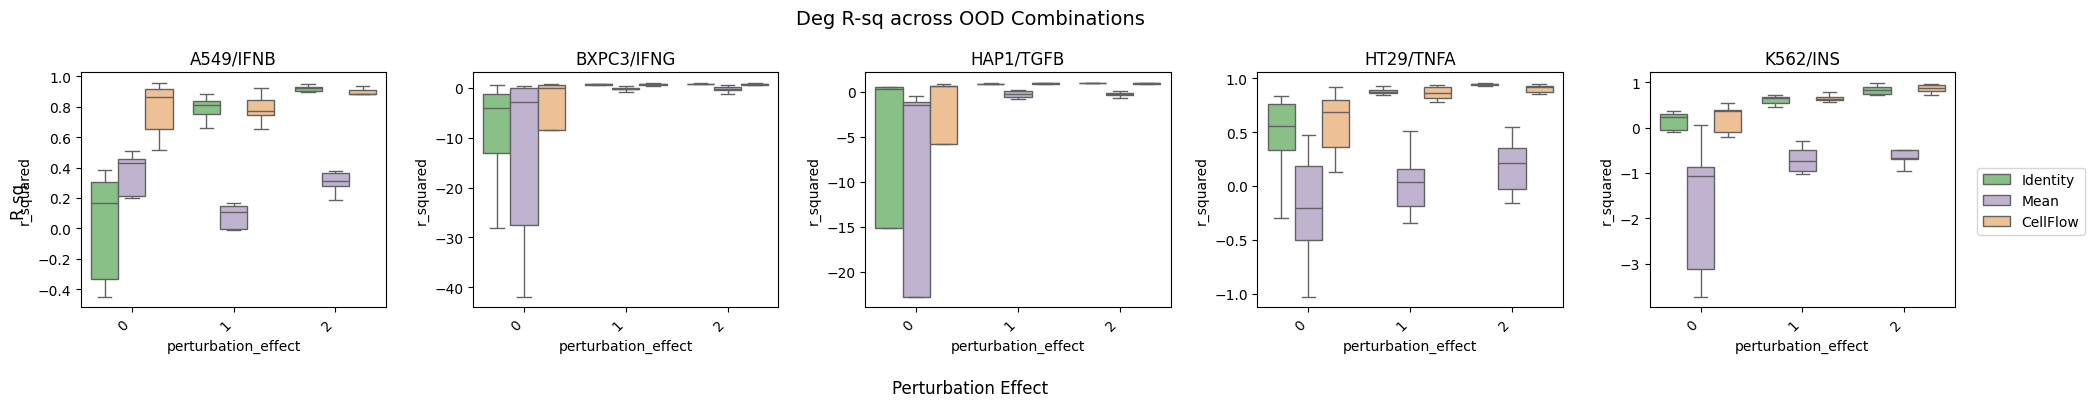

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select 5 unique ood_combination values
unique_combinations = deg_result_dfs["ood_combination"].unique()[:5]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=False)  # 5 columns, shared y-axis

# Iterate over unique combinations and plot in subplots
for i, combination in enumerate(unique_combinations):
    ax = axes[i]
    sns.boxplot(
        data=deg_result_dfs[deg_result_dfs["ood_combination"] == combination], 
        hue="Model", 
        x="perturbation_effect", 
        y="r_squared", 
        showfliers=False, 
        hue_order=["Identity", "Mean", "CellFlow"], 
        palette="Accent",
        ax=ax
    )

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    #ymin = max(-25, deg_result_dfs[(deg_result_dfs["ood_combination"] == combination)&(deg_result_dfs["Model"]=="CellFlow")]["r_squared"].min())
    #ymin = deg_result_dfs[(deg_result_dfs["ood_combination"] == combination)&(deg_result_dfs["Model"]=="CellFlow")]["r_squared"].min()
    
    #ax.set_ylim(ymin, 1)
    #ax.set_yscale('log')

    # Set title for each subplot
    ax.set_title(combination)

    # Remove legend from individual plots (keep only one legend for clarity)
    ax.legend_.remove()

# Add global labels
fig.supxlabel("Perturbation Effect", fontsize=12)
fig.supylabel("R sq", fontsize=12)
fig.suptitle("Deg R-sq across OOD Combinations", fontsize=14)

# Add a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
decoded_result_dfs = []

for comb in ["A549_IFNB", "BXPC3_IFNG", "HAP1_TGFB", "HT29_TNFA", "K562_INS"]:
    cellflow_res_decoded = pd.read_csv(path_to_results / f"cellflow_ood_metrics_decoded_{comb}.csv", index_col=0).T
    identity_res_decoded = pd.read_csv(path_to_results / f"identity_ood_metrics_decoded_{comb}.csv", index_col=0).T
    mean_res_decoded = pd.read_csv(path_to_results / f"mean_train_metrics_decoded_{comb}.csv", index_col=0).T

    split_comb = comb.split("_")
    cellflow_res_decoded["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 
    mean_res_decoded["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 
    identity_res_decoded["OOD combination"] = f"{split_comb[0]}/{split_comb[1]}" 

    cellflow_res_decoded["Model"] = "CellFlow" 
    mean_res_decoded["Model"] = "Mean" 
    identity_res_decoded["Model"] = "Identity" 

    decoded_result_dfs.append(cellflow_res_decoded)
    decoded_result_dfs.append(mean_res_decoded)
    decoded_result_dfs.append(identity_res_decoded)

In [16]:
decoded_result_dfs = pd.concat(decoded_result_dfs, axis=0)
decoded_result_dfs["ood_combination"] = decoded_result_dfs["OOD combination"] 
decoded_result_dfs["ood_cond"] = decoded_result_dfs.index
decoded_result_dfs["perturbation_effect"] = decoded_result_dfs.apply(get_pert_effect, axis=1)
decoded_result_dfs.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/figures/satija/benchmark/gene_pathway_cell_line_hold_out/metrics_decoded.csv")

/tmp/ipykernel_2387040/2079585806.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/2079585806.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/2079585806.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/2079585806.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2387040/2079585806.py:25: UserWarning

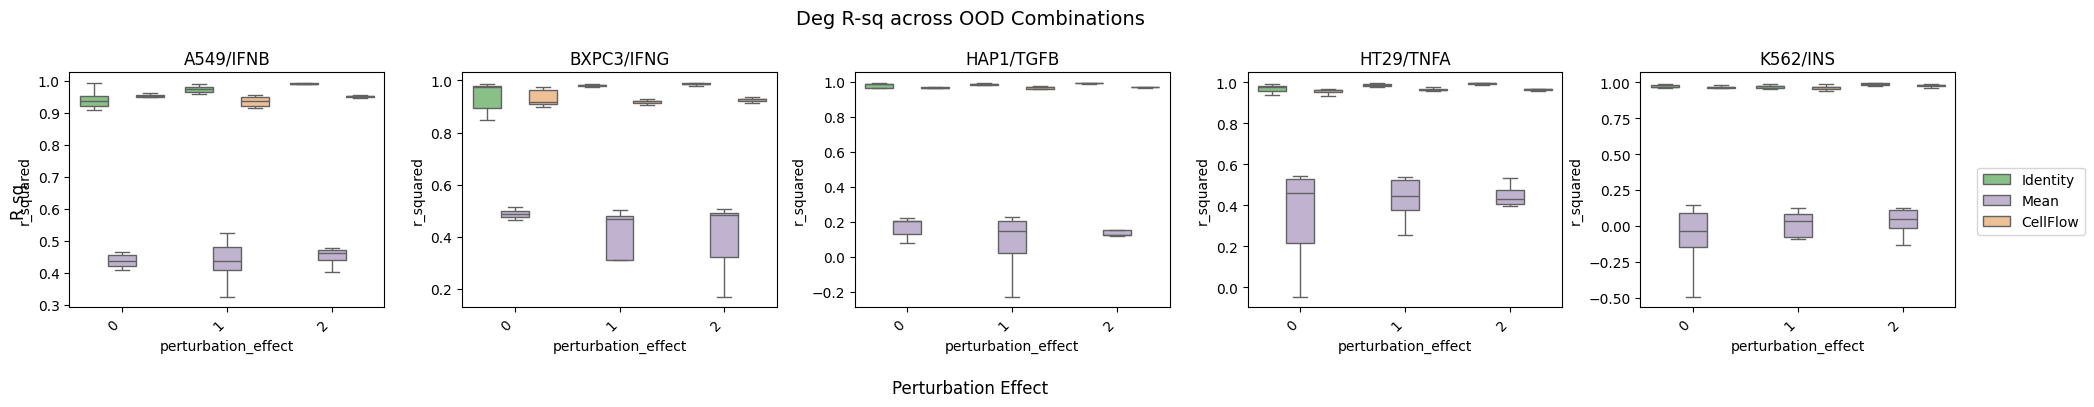

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select 5 unique ood_combination values
unique_combinations = decoded_result_dfs["ood_combination"].unique()[:5]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=False)  # 5 columns, shared y-axis

# Iterate over unique combinations and plot in subplots
for i, combination in enumerate(unique_combinations):
    ax = axes[i]
    sns.boxplot(
        data=decoded_result_dfs[decoded_result_dfs["ood_combination"] == combination], 
        hue="Model", 
        x="perturbation_effect", 
        y="r_squared", 
        showfliers=False, 
        hue_order=["Identity", "Mean", "CellFlow"], 
        palette="Accent",
        ax=ax
    )

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    #ymin = max(-25, deg_result_dfs[(deg_result_dfs["ood_combination"] == combination)&(deg_result_dfs["Model"]=="CellFlow")]["r_squared"].min())
    #ymin = deg_result_dfs[(deg_result_dfs["ood_combination"] == combination)&(deg_result_dfs["Model"]=="CellFlow")]["r_squared"].min()
    
    #ax.set_ylim(ymin, 1)
    #ax.set_yscale('log')

    # Set title for each subplot
    ax.set_title(combination)

    # Remove legend from individual plots (keep only one legend for clarity)
    ax.legend_.remove()

# Add global labels
fig.supxlabel("Perturbation Effect", fontsize=12)
fig.supylabel("R sq", fontsize=12)
fig.suptitle("Deg R-sq across OOD Combinations", fontsize=14)

# Add a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
